# <font color=orange><div style="text-align:center;">**OPENCLASSROOMS**</div></font>


## *PROJET 7 : Implémentez un modèle de scoring*


## <font color=orange><div style="text-align:center;">**SOMMAIRE**</font></span>

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from statsmodels.formula.api import ols

In [159]:
# import data

app_test = pd.read_csv('application_test.csv')
app_train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_bal = pd.read_csv('bureau_balance.csv')
cb_bal = pd.read_csv('credit_card_balance.csv')
installments_pay = pd.read_csv('installments_payments.csv')
pos_cash_bal = pd.read_csv('POS_CASH_balance.csv')
prev_app = pd.read_csv('previous_application.csv')
submission = pd.read_csv('sample_submission.csv')

In [160]:
# home_credit_col = pd.read_csv('homecredit_columns_description.csv', sep = ",")

In [161]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [163]:
app_test.shape

(48744, 121)

### Les contrats :

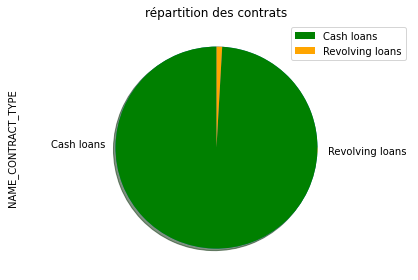

In [164]:
# répartition des contrats

app_test["NAME_CONTRACT_TYPE"].value_counts(normalize = True).plot(kind ='pie')
plt.axis('equal')
labels = ['Cash loans', 'Revolving loans']

c = app_test.loc[app_test['NAME_CONTRACT_TYPE'] == 'Cash loans'].shape[0]
r = app_test.loc[app_test['NAME_CONTRACT_TYPE'] == 'Revolving loans'].shape[0]

sizes = [c, r]
colors = ['green', 'orange']

patches, texts = plt.pie(sizes, shadow = True, colors = colors, startangle = 90)
plt.legend(patches, labels)
plt.title("répartition des contrats")
plt.tight_layout() # mise en page
plt.show()

In [165]:
app_test['NAME_CONTRACT_TYPE'].drop_duplicates(keep = 'first')

0          Cash loans
14    Revolving loans
Name: NAME_CONTRACT_TYPE, dtype: object

### Proportion des sexes:

In [166]:
app_test['CODE_GENDER'].drop_duplicates(keep = 'first')

0    F
1    M
Name: CODE_GENDER, dtype: object

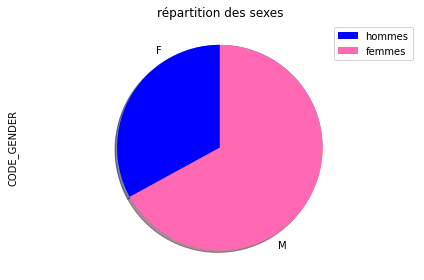

In [167]:
# répartition des sexes

app_test["CODE_GENDER"].value_counts(normalize = True).plot(kind ='pie')
plt.axis('equal')
labels = ['hommes', 'femmes']

m = app_test.loc[app_test['CODE_GENDER'] == 'M'].shape[0]
f = app_test.loc[app_test['CODE_GENDER'] == 'F'].shape[0]

sizes = [m, f]
colors = ['blue', 'hotpink']

patches, texts = plt.pie(sizes, shadow = True, colors = colors, startangle = 90)
plt.legend(patches, labels)
plt.title("répartition des sexes")
plt.tight_layout() # mise en page
plt.show()

### Les drapeaux :

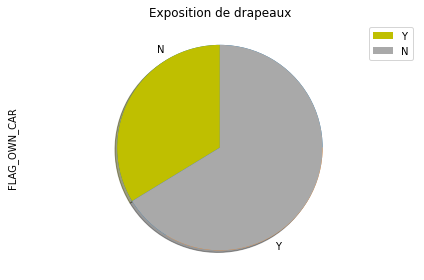

In [168]:
# répartition des contrats

app_test["FLAG_OWN_CAR"].value_counts(normalize = True).plot(kind ='pie')
plt.axis('equal')
labels = ['Y', 'N']

fc_y = app_test.loc[app_test['FLAG_OWN_CAR'] == 'Y'].shape[0]
fc_n = app_test.loc[app_test['FLAG_OWN_CAR'] == 'N'].shape[0]

sizes = [fc_y, fc_n]
colors = ['y', 'darkgrey']

patches, texts = plt.pie(sizes, shadow = True, colors = colors, startangle = 90)
plt.legend(patches, labels)
plt.title("Exposition de drapeaux")
plt.tight_layout() # mise en page
plt.show()

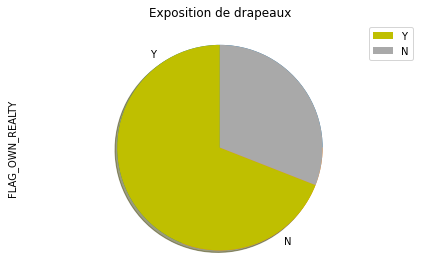

In [169]:
# répartition des contrats

app_test["FLAG_OWN_REALTY"].value_counts(normalize = True).plot(kind ='pie')
plt.axis('equal')
labels = ['Y', 'N']

fr_y = app_test.loc[app_test['FLAG_OWN_REALTY'] == 'Y'].shape[0]
fr_n = app_test.loc[app_test['FLAG_OWN_REALTY'] == 'N'].shape[0]

sizes = [fr_y, fr_n]
colors = ['y', 'darkgrey']

patches, texts = plt.pie(sizes, shadow = True, colors = colors, startangle = 90)
plt.legend(patches, labels)
plt.title("Exposition de drapeaux")
plt.tight_layout() # mise en page
plt.show()

### Le nombre d'enfants :

In [170]:
app_test['CNT_CHILDREN'].value_counts()

0     34685
1      9504
2      3949
3       535
4        49
5        12
8         3
6         3
11        2
20        1
7         1
Name: CNT_CHILDREN, dtype: int64

### Les revenus : 

{'whiskers': [<matplotlib.lines.Line2D at 0x16d80052488>,
 'caps': [<matplotlib.lines.Line2D at 0x16d8004f788>,
 'boxes': [<matplotlib.patches.PathPatch at 0x16d80052dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x16d8004bb48>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x16d80046608>]}

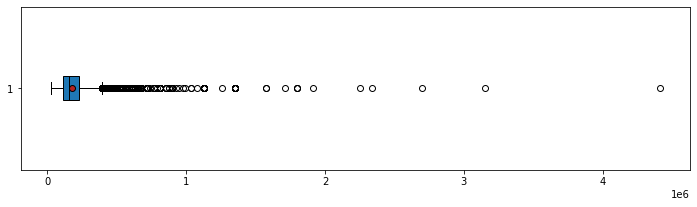

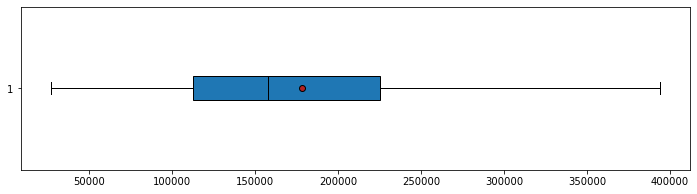

In [171]:
# boxplot avec et sans outliers

plt.figure(figsize = (12, 3))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(app_test['AMT_INCOME_TOTAL'], showfliers = True, medianprops = medianprops, 
            vert= False, patch_artist = True, showmeans = True, meanprops = meanprops)

plt.figure(figsize = (12, 3))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(app_test['AMT_INCOME_TOTAL'], showfliers = False, medianprops = medianprops, 
            vert= False, patch_artist = True, showmeans = True, meanprops = meanprops)

### Quelles sont les différences entre le test et le train au niveau des colonnes ?

In [172]:
app_train.shape

(307511, 122)

In [173]:
set(app_test.columns).symmetric_difference(app_train.columns)

{'TARGET'}

In [174]:
app_train['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

### Je vais chercher à fusionner les datasets en cherchant des éventuelles clés de jointure.

In [175]:
bureau.shape

(1716428, 17)

In [176]:
bureau.head(1)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN


In [177]:
# quelle est la clé ?

app_train.columns.intersection(bureau.columns)

Index(['SK_ID_CURR', 'AMT_ANNUITY'], dtype='object')

### Merge en partant de "app_train".

In [178]:
# merge app_train et bureau

app_train_bureau = pd.merge(app_train, bureau, on = ['SK_ID_CURR','AMT_ANNUITY'], how = 'left')
app_train_bureau.shape

(307518, 137)

In [179]:
bureau_bal.shape

(27299925, 3)

In [180]:
bureau_bal.head(1)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C


In [181]:
bureau_bal.columns.intersection(app_train_bureau.columns)

Index(['SK_ID_BUREAU'], dtype='object')

In [182]:
# merge app_train_bureau et bureau_bal

app_train_bureau_bureau_bal = pd.merge(app_train_bureau, bureau_bal, on = ['SK_ID_BUREAU'], how = 'left')
app_train_bureau_bureau_bal.shape

(307998, 139)

In [183]:
cb_bal.shape

(3840312, 23)

In [184]:
cb_bal.columns.intersection(app_train_bureau_bureau_bal.columns)

Index(['SK_ID_CURR', 'MONTHS_BALANCE'], dtype='object')

In [185]:
# merge app_train_bureau_bureau_bal et cb_bal

app_train_bureau_bureau_bal_cb_bal = pd.merge(app_train_bureau_bureau_bal, cb_bal, on = ['SK_ID_CURR','MONTHS_BALANCE'], 
                                              how = 'left')
app_train_bureau_bureau_bal_cb_bal.shape

(307998, 160)

In [186]:
installments_pay.shape

(13605401, 8)

In [187]:
installments_pay.columns.intersection(app_train_bureau_bureau_bal_cb_bal.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR'], dtype='object')

In [188]:
# merge app_train_bureau_bureau_bal_cb_bal et installments_pay

app_train_bureau_bureau_bal_cb_bal_installments_pay = pd.merge(app_train_bureau_bureau_bal_cb_bal, installments_pay, 
                                              on = ['SK_ID_PREV','SK_ID_CURR'], how = 'left')
app_train_bureau_bureau_bal_cb_bal_installments_pay.shape

(321207, 166)

In [189]:
pos_cash_bal.shape

(10001358, 8)

In [190]:
pos_cash_bal.columns.intersection(app_train_bureau_bureau_bal_cb_bal_installments_pay.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'NAME_CONTRACT_STATUS',
       'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

In [191]:
# merge app_train_bureau_bureau_bal_cb_bal_installments_pay et pos_cash_bal

app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal = \
                    pd.merge(app_train_bureau_bureau_bal_cb_bal_installments_pay, pos_cash_bal,
                    on = ['SK_ID_PREV','SK_ID_CURR','MONTHS_BALANCE','NAME_CONTRACT_STATUS','SK_DPD','SK_DPD_DEF'], 
                    how = 'left')
app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal.shape

(321207, 168)

In [192]:
prev_app.shape

(1670214, 37)

In [193]:
prev_app.columns.intersection(app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE'],
      dtype='object')

In [194]:
# merge app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal et prev_app

app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal_prev_app = \
                    pd.merge(app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal, prev_app,
                    on = ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
                    'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
                    'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE'], how = 'left')
app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal_prev_app.shape

(321207, 195)

In [195]:
submission.shape

(48744, 2)

In [196]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


### Ce dataset a le même nombre de lignes que app_test et présente la target, je les joins :

In [197]:
# merge app_test et submission

app_test_submission = pd.merge(app_test, submission, on = ['SK_ID_CURR'], how = 'inner')
app_test_submission.shape

(48744, 122)

### Le taux de remplissage des colonnes :

In [198]:
df = app_train_bureau_bureau_bal_cb_bal_installments_pay_pos_cash_bal_prev_app

In [199]:
# je ne conserve que les colonnes remplies à plus de 90%

cols_to_delete = df.columns[df.isnull().sum()/len(df) > .10]
df.drop(cols_to_delete, axis = 1, inplace = True)
df.shape

(321207, 65)

In [200]:
# je vérifie l'état de la colonne cible

df.loc[df.TARGET].shape[0]

321207

### Ici j'ai uniquement les colonnes qui sont remplies à plus de 90%, je ne conserve que celles-ci dans le dataset principal.

In [201]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

### Vérification des doublons sur ID :

In [202]:
df.drop_duplicates(subset=['SK_ID_CURR'], keep='first').shape

(307511, 65)

### Il y a des doublons sur "SK_ID_CURR", certains clients doivent avoir plusieurs crédits, je vais devoir faire une agrégation groupby sur "SK_ID_CURR".

In [203]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


### Séparation des variables numériques et qualitatives :

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321207 entries, 0 to 321206
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   321207 non-null  int64  
 1   TARGET                       321207 non-null  int64  
 2   NAME_CONTRACT_TYPE           321207 non-null  object 
 3   CODE_GENDER                  321207 non-null  object 
 4   FLAG_OWN_CAR                 321207 non-null  object 
 5   FLAG_OWN_REALTY              321207 non-null  object 
 6   CNT_CHILDREN                 321207 non-null  int64  
 7   AMT_INCOME_TOTAL             321207 non-null  float64
 8   AMT_CREDIT                   321207 non-null  float64
 9   AMT_ANNUITY                  307889 non-null  float64
 10  AMT_GOODS_PRICE              320929 non-null  float64
 11  NAME_TYPE_SUITE              319915 non-null  object 
 12  NAME_INCOME_TYPE             321207 non-null  object 
 13 

# <font color = 'red'> Variables numériques

In [205]:
df_num = df.select_dtypes(exclude=['object'])
df_num.shape

(321207, 54)

In [206]:
df_qual = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE']]
df_qual.shape

(321207, 13)

### Observation de la distribution des variables :

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>],
       [<AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>],
       [<AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLA

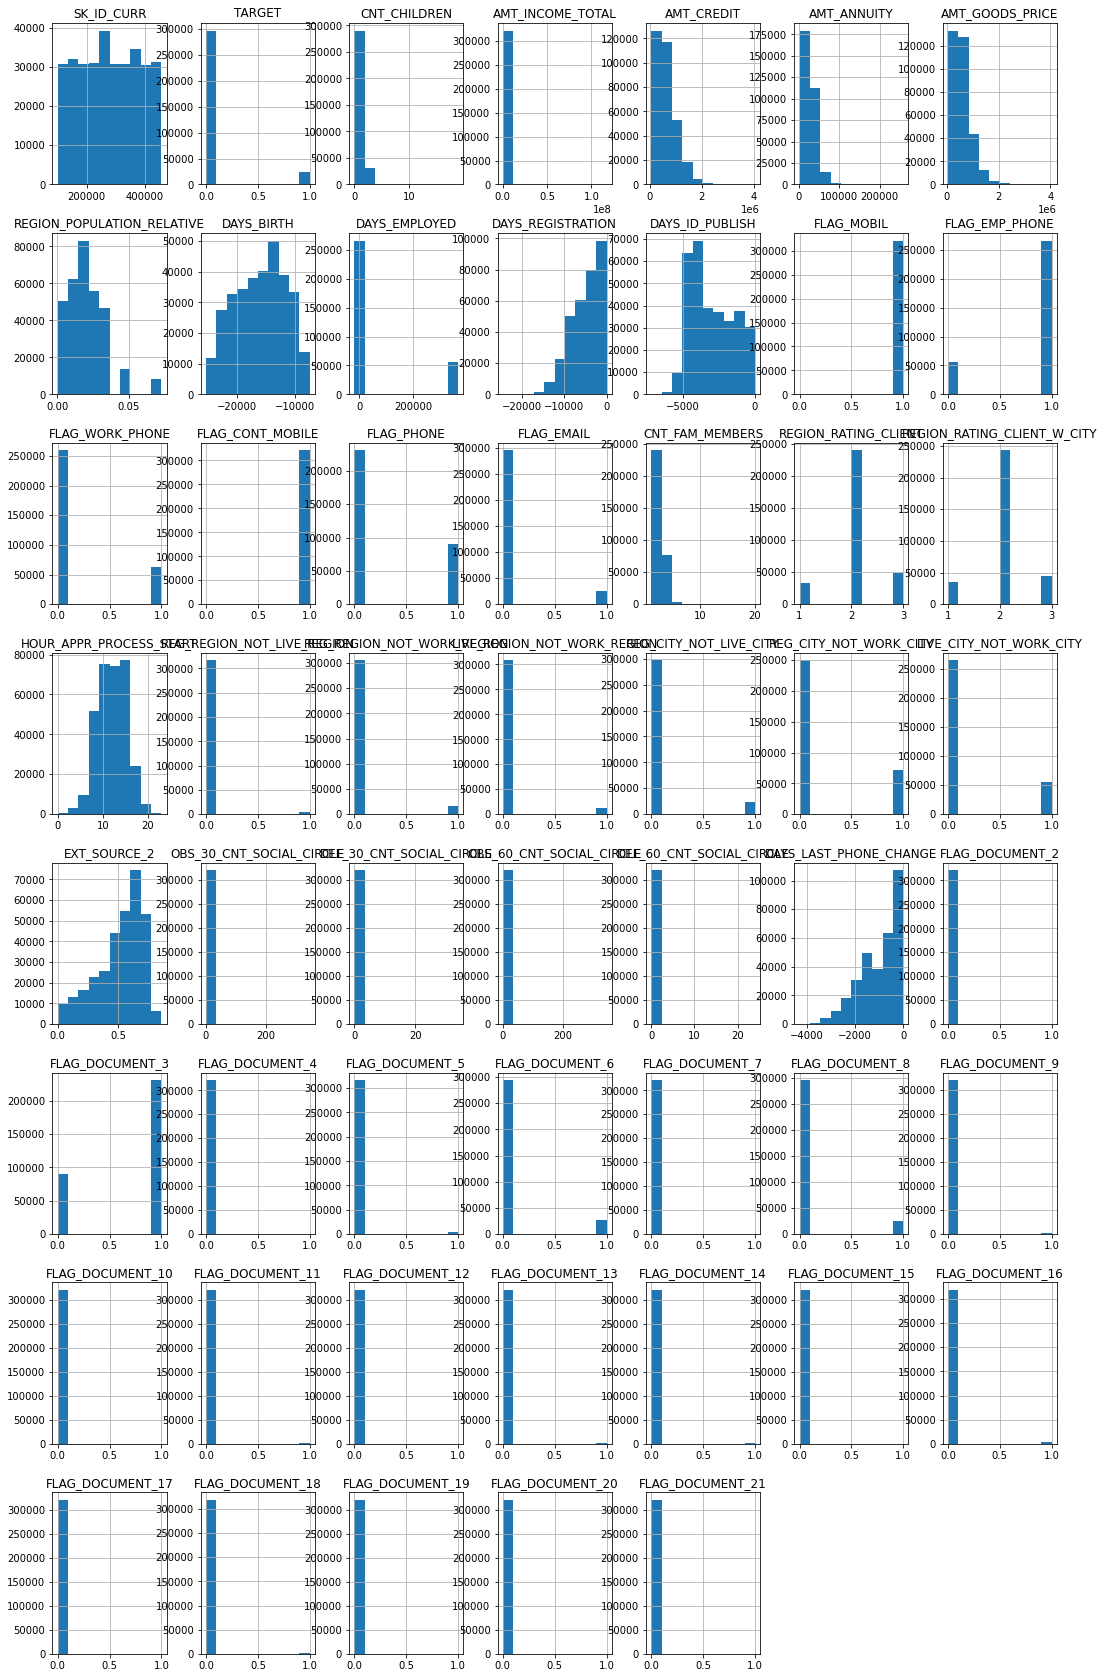

In [207]:
df_num.hist(figsize=(18, 30))

### Je pense que la distribution peut être améliorée en transformant certaines variables au logarithme.

In [208]:
# Amélioration de la distribution des distribution par le logarithme ou bien en rendant la durée positive

df_num['AMT_ANNUITY'] = np.log(df['AMT_ANNUITY'])
df_num['AMT_CREDIT'] = np.log(df['AMT_CREDIT'])
df_num['AMT_GOODS_PRICE'] = np.log(df['AMT_GOODS_PRICE'])
df_num['CNT_FAM_MEMBERS'] = np.log(df['CNT_FAM_MEMBERS'])
df_num['DAYS_BIRTH'] = np.log((-1) * df['DAYS_BIRTH'])
df_num['DAYS_ID_PUBLISH'] = (-1 * (df['DAYS_ID_PUBLISH']))
df_num['DAYS_LAST_PHONE_CHANGE'] = np.log(1 + (-1) * df['DAYS_LAST_PHONE_CHANGE'])
df_num['DAYS_REGISTRATION'] = np.log(1 + (-1) * df['DAYS_REGISTRATION'])
df_num['EXT_SOURCE_2'] = (-1 * (df['EXT_SOURCE_2']))
df_num['REGION_POPULATION_RELATIVE'] = np.log(df['REGION_POPULATION_RELATIVE'])

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>],
       [<AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>],
       [<AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLA

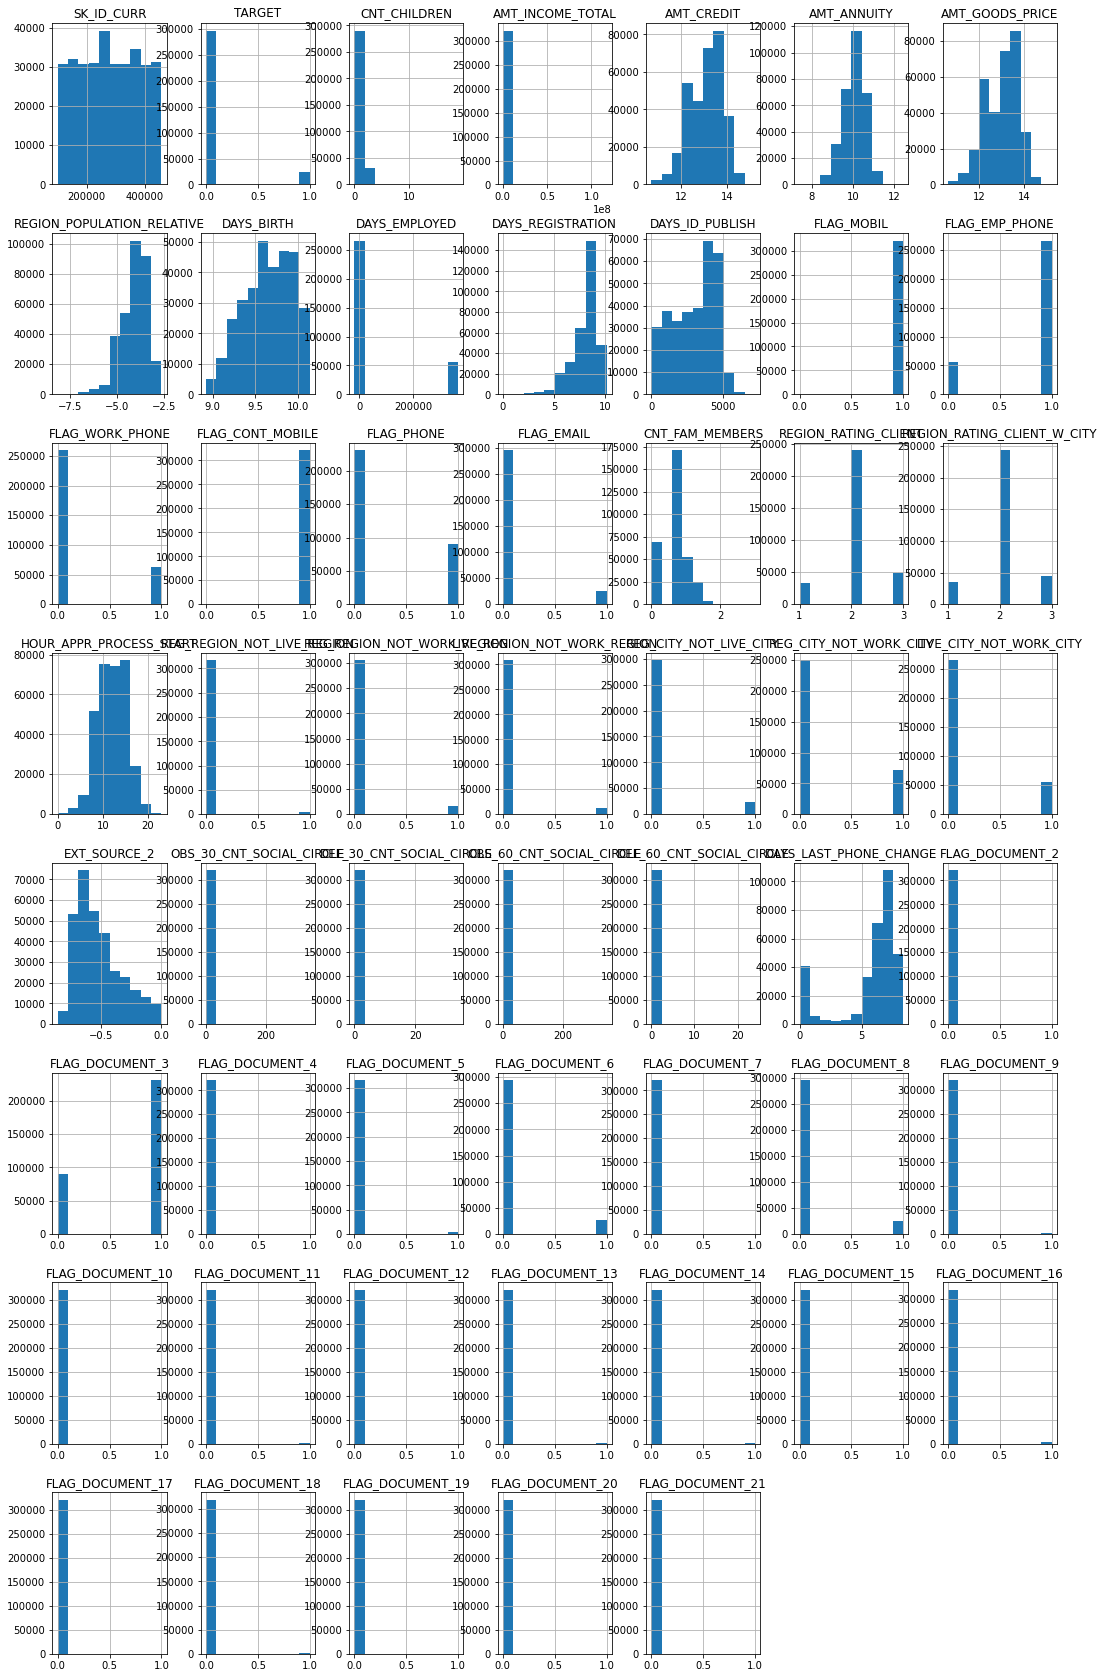

In [209]:
df_num.hist(figsize=(18, 30))

### Je dresse une matrice de corrélation sur les var numériques.

<AxesSubplot:>

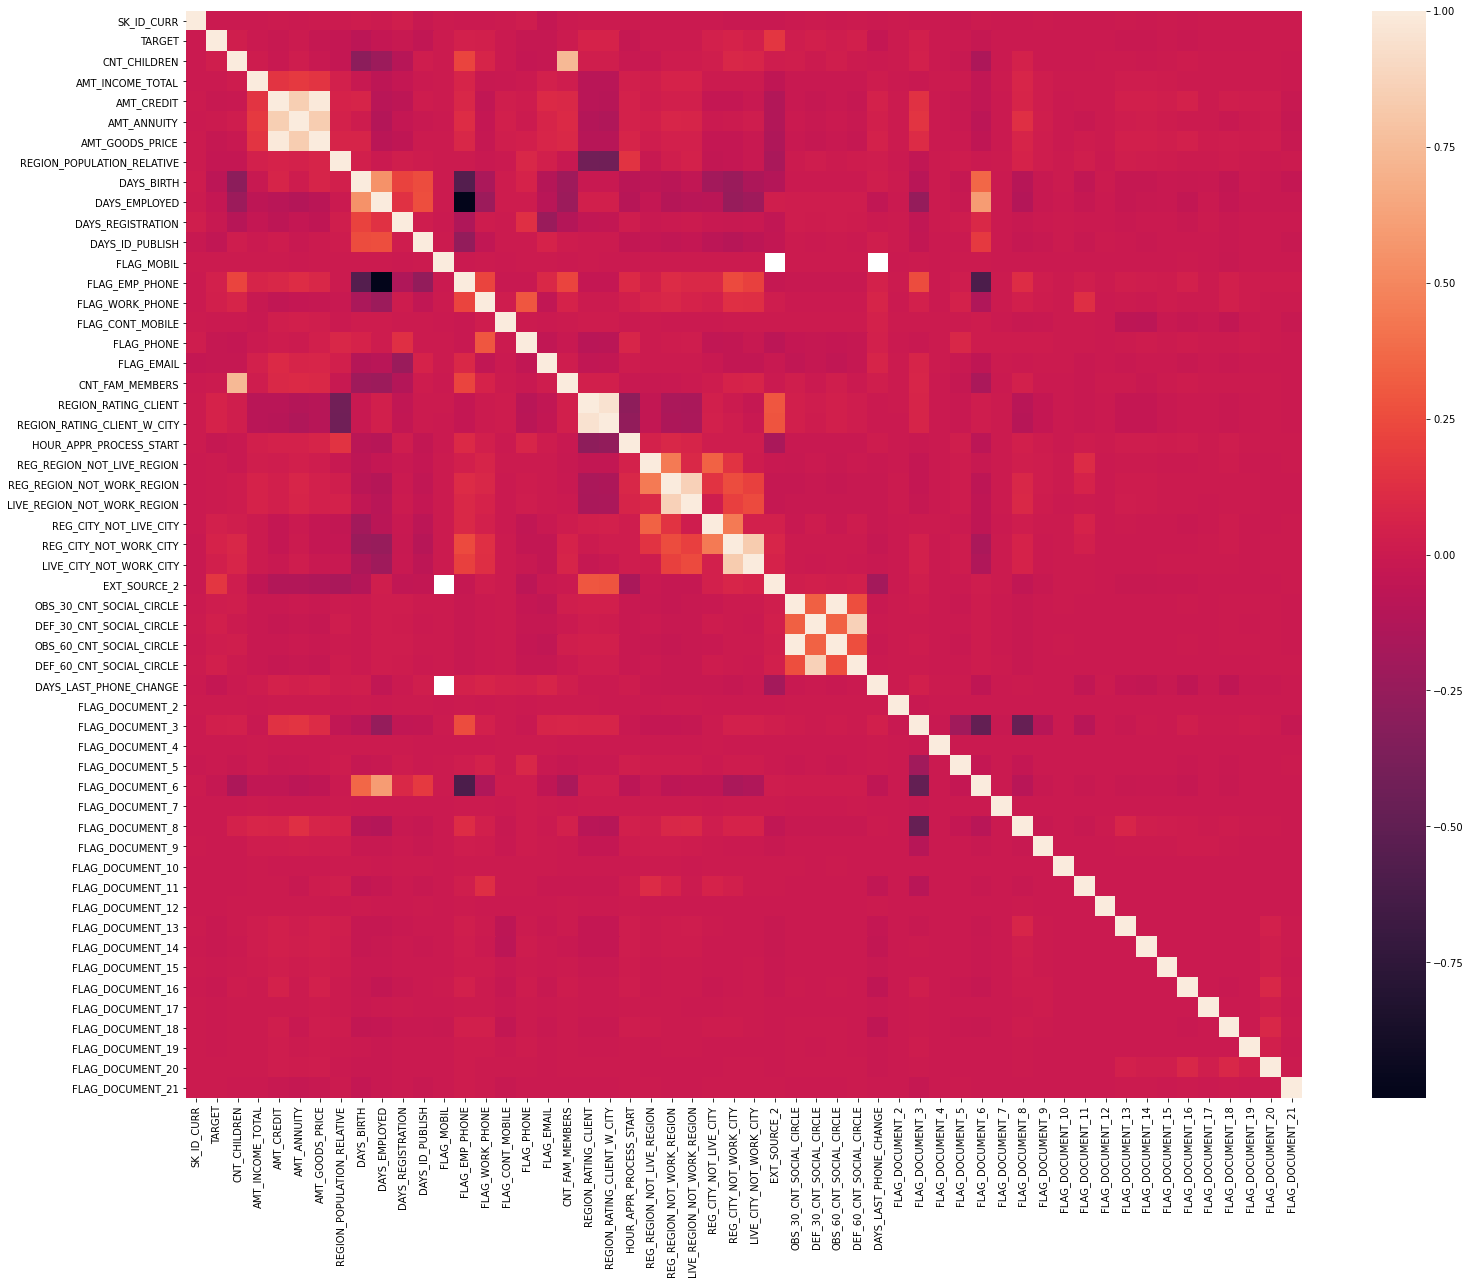

In [210]:
plt.figure(figsize = (25, 20))

corrMatrix = df_num.corr()
sn.heatmap(corrMatrix, annot = False)

### Dans le souci de ne pas avoir des variables trop corrélées entre elles, je cherche les paires qui auraient un indice de Pearson > 0.85:

In [211]:
# Je cherche qu'elles sont les paires corrélées à plus de 0.85

corr_matrix = df_num.corr().abs()
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(corr_matrix.columns[x],corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
high_corr_var

[('AMT_CREDIT', 'AMT_GOODS_PRICE'),
 ('DAYS_EMPLOYED', 'FLAG_EMP_PHONE'),
 ('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'),
 ('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')]

In [212]:
# Ce code sélectionne les corrélations supérieures à 0.85 et les supprime du df directement

corr_matrix = df_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
df_num.drop(to_drop, axis=1, inplace=True)

### Les variables qui ont le plus d'importance sur la target:

In [213]:
# Sélect influence sur cible

importance_var_num = df_num.apply(lambda x: x.corr(df_num.TARGET))

importance_var_num.sort_values(ascending = False)

TARGET                         1.000000
EXT_SOURCE_2                   0.162324
REGION_RATING_CLIENT           0.060757
REG_CITY_NOT_WORK_CITY         0.055372
REG_CITY_NOT_LIVE_CITY         0.046034
FLAG_DOCUMENT_3                0.038199
DEF_30_CNT_SOCIAL_CIRCLE       0.036116
LIVE_CITY_NOT_WORK_CITY        0.035982
DEF_60_CNT_SOCIAL_CIRCLE       0.034608
FLAG_WORK_PHONE                0.032456
CNT_CHILDREN                   0.026165
OBS_30_CNT_SOCIAL_CIRCLE       0.016153
REG_REGION_NOT_WORK_REGION     0.007547
REG_REGION_NOT_LIVE_REGION     0.007109
CNT_FAM_MEMBERS                0.006381
FLAG_DOCUMENT_2                0.005487
FLAG_DOCUMENT_21               0.003929
LIVE_REGION_NOT_WORK_REGION    0.002943
AMT_ANNUITY                    0.000949
FLAG_MOBIL                     0.000511
FLAG_DOCUMENT_20               0.000496
FLAG_CONT_MOBILE              -0.000170
FLAG_DOCUMENT_12              -0.000722
FLAG_DOCUMENT_5               -0.001032
FLAG_DOCUMENT_19              -0.001050


In [214]:
importance_var_num.count()

50

### Malheureusement, aucune variable n'a de grosse influence sur la cible. Je vais quand même supprimer celles qui sont négligeables afin que le modèle tourne plus rapidement.

In [215]:
df_num = df_num[['SK_ID_CURR','TARGET','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED',
                 'REGION_POPULATION_RELATIVE','FLAG_EMAIL','HOUR_APPR_PROCESS_START','FLAG_DOCUMENT_6',
                 'FLAG_PHONE','AMT_CREDIT','DAYS_REGISTRATION','FLAG_DOCUMENT_13','FLAG_DOCUMENT_16',
                 'AMT_INCOME_TOTAL',
                
                 'EXT_SOURCE_2','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY',
                 'FLAG_DOCUMENT_3','DEF_30_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY','FLAG_WORK_PHONE',
                 'CNT_CHILDREN','OBS_30_CNT_SOCIAL_CIRCLE']]

df_num.shape

(321207, 26)

# <font color = 'red'> Variables qualitatives

### Intéressons nous aux variables qualitatives, nous allons étudier leur impact sur la cible, et les dummiser pour pouvoir les utiliser dans le modèle de scoring.

In [216]:
df_qual.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

### Je calcule le R squared pour les futures features qualitatives avec la variable cible "target":

In [217]:
anova_1 = ols('TARGET ~ NAME_TYPE_SUITE', data = df_qual).fit()
anova_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.84
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           4.24e-12
Time:                        10:59:29   Log-Likelihood:                -31760.
No. Observations:              319915   AIC:                         6.353e+04
Df Residuals:                  319908   BIC:                         6.361e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.0738      0.005     15.778      0.000       0.065       0.083
NAME_TYPE_SUITE[T.Family]             -0.0050      0.005     -1.035      0.301      -0.015       0.004
NAME_TYPE_SUITE[T.Group of people]     0.0111      0.017      0.657      0.511      -0.022       0.044
NAME_TYPE_SUITE[T.Other_A]             0.0140      0.010      1.370      0.171      -0.006       0.034
NAME_TYPE_SUITE[T.Other_B]             0.0245      0.008      3.111      0.002       0.009       0.040
NAME_TYPE_SUITE[T.Spouse, partner]     0.0049      0.005      0.933      0.351      -0.005       0.015
NAME_TYPE_SUITE[T.Unaccompanied]       0.0049      0.005      1.046      0.296      -0.004       0.014
==============================================================================
Omnibus:                   199900.973   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1385510.388
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      10.998   Cond. No.                         48.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
anova_2 = ols('TARGET ~ NAME_CONTRACT_TYPE', data = df_qual).fit()
anova_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     247.1
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           1.15e-55
Time:                        10:59:30   Log-Likelihood:                -31620.
No. Observations:              321207   AIC:                         6.324e+04
Df Residuals:                  321205   BIC:                         6.326e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.0797      0.000    161.149      0.000       0.079       0.081
NAME_CONTRACT_TYPE[T.Revolving loans]    -0.0256      0.002    -15.720      0.000      -0.029      -0.022
==============================================================================
Omnibus:                   200712.290   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1392116.947
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      11.003   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
anova_3 = ols('TARGET ~ FLAG_OWN_REALTY', data = df_qual).fit()
anova_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     44.23
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           2.92e-11
Time:                        10:59:32   Log-Likelihood:                -31721.
No. Observations:              321207   AIC:                         6.345e+04
Df Residuals:                  321205   BIC:                         6.347e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0821      0.001     95.027      0.000       0.080       0.084
FLAG_OWN_REALTY[T.Y]    -0.0069      0.001     -6.651      0.000      -0.009      -0.005
==============================================================================
Omnibus:                   200896.374   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1395603.119
Skew:                           3.164   Prob(JB):                         0.00
Kurtosis:                      11.014   Cond. No.                         3.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
anova_4 = ols('TARGET ~ CODE_GENDER', data = df_qual).fit()
anova_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     608.0
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          2.86e-264
Time:                        10:59:33   Log-Likelihood:                -31136.
No. Observations:              321207   AIC:                         6.228e+04
Df Residuals:                  321204   BIC:                         6.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0658      0.001    114.552      0.000       0.065       0.067
CODE_GENDER[T.M]       0.0349      0.001     34.866      0.000       0.033       0.037
CODE_GENDER[T.XNA]    -0.0658      0.133     -0.494      0.621      -0.327       0.195
==============================================================================
Omnibus:                   199914.182   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1377926.743
Skew:                           3.147   Prob(JB):                         0.00
Kurtosis:                      10.958   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
anova_5 = ols('TARGET ~ NAME_HOUSING_TYPE', data = df_qual).fit()
anova_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          3.97e-110
Time:                        10:59:34   Log-Likelihood:                -31483.
No. Observations:              321207   AIC:                         6.298e+04
Df Residuals:                  321201   BIC:                         6.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.0793      0.008      9.955      0.000       0.064       0.095
NAME_HOUSING_TYPE[T.House / apartment]      -0.0050      0.008     -0.632      0.528      -0.021       0.011
NAME_HOUSING_TYPE[T.Municipal apartment]     0.0061      0.008      0.727      0.467      -0.010       0.022
NAME_HOUSING_TYPE[T.Office apartment]       -0.0136      0.010     -1.428      0.153      -0.032       0.005
NAME_HOUSING_TYPE[T.Rented apartment]        0.0431      0.009      4.881      0.000       0.026       0.060
NAME_HOUSING_TYPE[T.With parents]            0.0377      0.008      4.557      0.000       0.021       0.054
==============================================================================
Omnibus:                   200523.439   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1389147.234
Skew:                           3.158   Prob(JB):                         0.00
Kurtosis:                      10.995   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
anova_6 = ols('TARGET ~ NAME_FAMILY_STATUS', data = df_qual).fit()
anova_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     69.33
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           9.98e-73
Time:                        10:59:36   Log-Likelihood:                -31570.
No. Observations:              321207   AIC:                         6.315e+04
Df Residuals:                  321201   BIC:                         6.322e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.0775      0.001     56.745      0.000       0.075       0.080
NAME_FAMILY_STATUS[T.Married]                 -0.0034      0.001     -2.263      0.024      -0.006      -0.000
NAME_FAMILY_STATUS[T.Separated]                0.0030      0.002      1.298      0.194      -0.002       0.008
NAME_FAMILY_STATUS[T.Single / not married]     0.0187      0.002     10.160      0.000       0.015       0.022
NAME_FAMILY_STATUS[T.Unknown]                 -0.0775      0.189     -0.411      0.681      -0.447       0.292
NAME_FAMILY_STATUS[T.Widow]                   -0.0193      0.003     -7.676      0.000      -0.024      -0.014
==============================================================================
Omnibus:                   200641.787   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1390987.994
Skew:                           3.160   Prob(JB):                         0.00
Kurtosis:                      11.000   Cond. No.                         487.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
anova_7 = ols('TARGET ~ NAME_EDUCATION_TYPE', data = df_qual).fit()
anova_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          1.49e-186
Time:                        10:59:37   Log-Likelihood:                -31309.
No. Observations:              321207   AIC:                         6.263e+04
Df Residuals:                  321202   BIC:                         6.268e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                0.0183      0.021      0.878      0.380      -0.023       0.059
NAME_EDUCATION_TYPE[T.Higher education]                  0.0347      0.021      1.663      0.096      -0.006       0.076
NAME_EDUCATION_TYPE[T.Incomplete higher]                 0.0641      0.021      3.055      0.002       0.023       0.105
NAME_EDUCATION_TYPE[T.Lower secondary]                   0.0910      0.021      4.277      0.000       0.049       0.133
NAME_EDUCATION_TYPE[T.Secondary / secondary special]     0.0663      0.021      3.182      0.001       0.025       0.107
==============================================================================
Omnibus:                   200162.103   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1381891.553
Skew:                           3.152   Prob(JB):                         0.00
Kurtosis:                      10.970   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
anova_8 = ols('TARGET ~ NAME_EDUCATION_TYPE', data = df_qual).fit()
anova_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          1.49e-186
Time:                        10:59:39   Log-Likelihood:                -31309.
No. Observations:              321207   AIC:                         6.263e+04
Df Residuals:                  321202   BIC:                         6.268e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                0.0183      0.021      0.878      0.380      -0.023       0.059
NAME_EDUCATION_TYPE[T.Higher education]                  0.0347      0.021      1.663      0.096      -0.006       0.076
NAME_EDUCATION_TYPE[T.Incomplete higher]                 0.0641      0.021      3.055      0.002       0.023       0.105
NAME_EDUCATION_TYPE[T.Lower secondary]                   0.0910      0.021      4.277      0.000       0.049       0.133
NAME_EDUCATION_TYPE[T.Secondary / secondary special]     0.0663      0.021      3.182      0.001       0.025       0.107
==============================================================================
Omnibus:                   200162.103   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1381891.553
Skew:                           3.152   Prob(JB):                         0.00
Kurtosis:                      10.970   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
anova_9 = ols('TARGET ~ FLAG_OWN_CAR', data = df_qual).fit()
anova_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     67.07
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           2.62e-16
Time:                        10:59:40   Log-Likelihood:                -31710.
No. Observations:              321207   AIC:                         6.342e+04
Df Residuals:                  321205   BIC:                         6.344e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0800      0.001    139.156      0.000       0.079       0.081
FLAG_OWN_CAR[T.Y]    -0.0082      0.001     -8.190      0.000      -0.010      -0.006
==============================================================================
Omnibus:                   200876.208   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1395226.725
Skew:                           3.164   Prob(JB):                         0.00
Kurtosis:                      11.013   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
anova_10 = ols('TARGET ~ ORGANIZATION_TYPE', data = df_qual).fit()
anova_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     26.79
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          4.96e-281
Time:                        10:59:42   Log-Likelihood:                -30981.
No. Observations:              321207   AIC:                         6.208e+04
Df Residuals:                  321149   BIC:                         6.270e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       0.0816      0.013      6.341      0.000       0.056       0.107
ORGANIZATION_TYPE[T.Agriculture]                0.0231      0.014      1.659      0.097      -0.004       0.050
ORGANIZATION_TYPE[T.Bank]                      -0.0297      0.014     -2.135      0.033      -0.057      -0.002
ORGANIZATION_TYPE[T.Business Entity Type 1]    -0.0002      0.013     -0.015      0.988      -0.026       0.026
ORGANIZATION_TYPE[T.Business Entity Type 2]     0.0037      0.013      0.282      0.778      -0.022       0.029
ORGANIZATION_TYPE[T.Business Entity Type 3]     0.0109      0.013      0.848      0.396      -0.014       0.036
ORGANIZATION_TYPE[T.Cleaning]                   0.0300      0.021      1.430      0.153      -0.011       0.071
ORGANIZATION_TYPE[T.Construction]               0.0368      0.013      2.772      0.006       0.011       0.063
ORGANIZATION_TYPE[T.Culture]                   -0.0262      0.019     -1.393      0.164      -0.063       0.011
ORGANIZATION_TYPE[T.Electricity]               -0.0153      0.016     -0.985      0.325      -0.046       0.015
ORGANIZATION_TYPE[T.Emergency]                 -0.0102      0.017     -0.594      0.553      -0.044       0.023
ORGANIZATION_TYPE[T.Government]                -0.0145      0.013     -1.107      0.268      -0.040       0.011
ORGANIZATION_TYPE[T.Hotel]                     -0.0174      0.015     -1.126      0.260      -0.048       0.013
ORGANIZATION_TYPE[T.Housing]                   -0.0021      0.014     -0.155      0.877      -0.029       0.025
ORGANIZATION_TYPE[T.Industry: type 1]           0.0291      0.015      1.903      0.057      -0.001       0.059
ORGANIZATION_TYPE[T.Industry: type 10]         -0.0174      0.029     -0.607      0.544      -0.073       0.039
ORGANIZATION_TYPE[T.Industry: type 11]          0.0050      0.014      0.358      0.721      -0.022       0.032
ORGANIZATION_TYPE[T.Industry: type 12]         -0.0436      0.019     -2.307      0.021      -0.081      -0.007
ORGANIZATION_TYPE[T.Industry: type 13]          0.0527      0.035      1.507      0.132      -0.016       0.121
ORGANIZATION_TYPE[T.Industry: type 2]          -0.0095      0.018     -0.532      0.594      -0.045       0.026
ORGANIZATION_TYPE[T.Industry: type 3]           0.0246      0.014      1.796      0.072      -0.002       0.051
ORGANIZATION_TYPE[T.Industry: type 4]           0.0199      0.016      1.267      0.205      -0.011       0.051
ORGANIZATION_TYPE[T.Industry: type 5]          -0.0131      0.017     -0.779      0.436      -0.046       0.020
ORGANIZATION_TYPE[T.Industry: type 6]          -0.0102      0.028     -0.359      0.719      -0.066       0.045
ORGANIZATION_TYPE[T.Industry: type 7]          -0.0012     

In [227]:
anova_11 = ols('TARGET ~ WEEKDAY_APPR_PROCESS_START', data = df_qual).fit()
anova_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     48.60
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           5.47e-60
Time:                        10:59:44   Log-Likelihood:                -31597.
No. Observations:              321207   AIC:                         6.321e+04
Df Residuals:                  321200   BIC:                         6.328e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.0799      0.001     67.819      0.000       0.078       0.082
WEEKDAY_APPR_PROCESS_START[T.MONDAY]       -0.0024      0.002     -1.419      0.156      -0.006       0.001
WEEKDAY_APPR_PROCESS_START[T.SATURDAY]     -0.0218      0.002    -12.686      0.000      -0.025      -0.018
WEEKDAY_APPR_PROCESS_START[T.SUNDAY]       -0.0023      0.002     -0.975      0.330      -0.007       0.002
WEEKDAY_APPR_PROCESS_START[T.THURSDAY]      0.0010      0.002      0.612      0.540      -0.002       0.004
WEEKDAY_APPR_PROCESS_START[T.TUESDAY]       0.0038      0.002      2.278      0.023       0.001       0.007
WEEKDAY_APPR_PROCESS_START[T.WEDNESDAY]     0.0012      0.002      0.710      0.478      -0.002       0.004
==============================================================================
Omnibus:                   200675.865   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1391469.258
Skew:                           3.160   Prob(JB):                         0.00
Kurtosis:                      11.001   Cond. No.                         7.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
# select des variables quali

df_qual_select = df_qual[['SK_ID_CURR', 'TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','ORGANIZATION_TYPE',
                          'NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START',
                          'NAME_TYPE_SUITE','FLAG_OWN_REALTY','FLAG_OWN_CAR']]

### J'encode en one hot encoding les variables catégorielles en vu du scoring.

In [229]:
dummies = pd.get_dummies(df_qual_select, prefix = ['sex','educ_level','income_type','orga_type','name_contract',
                                                   'housing_type','family_status','weekday_process','type_suite',
                                                   'flag_realty','flag_car'], 
                            columns = ['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','ORGANIZATION_TYPE',
                                       'NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS',
                                       'WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','FLAG_OWN_REALTY',
                                       'FLAG_OWN_CAR'])
display(dummies.columns)
dummies.shape

Index(['SK_ID_CURR', 'TARGET', 'sex_F', 'sex_M', 'sex_XNA',
       'educ_level_Academic degree', 'educ_level_Higher education',
       'educ_level_Incomplete higher', 'educ_level_Lower secondary',
       'educ_level_Secondary / secondary special',
       ...
       'type_suite_Family', 'type_suite_Group of people', 'type_suite_Other_A',
       'type_suite_Other_B', 'type_suite_Spouse, partner',
       'type_suite_Unaccompanied', 'flag_realty_N', 'flag_realty_Y',
       'flag_car_N', 'flag_car_Y'],
      dtype='object', length=108)

(321207, 108)

In [230]:
# Sélection de variables à plus grande influence

importance_dummies = dummies.apply(lambda x: x.corr(dummies.TARGET))
importance_dummies.sort_values(ascending = False)

TARGET                                      1.000000
sex_M                                       0.061405
income_type_Working                         0.052828
educ_level_Secondary / secondary special    0.043504
housing_type_With parents                   0.032677
                                              ...   
housing_type_House / apartment             -0.032758
orga_type_XNA                              -0.039904
income_type_Pensioner                      -0.040126
educ_level_Higher education                -0.050635
sex_F                                      -0.061397
Length: 108, dtype: float64

### Je fais une sélection des dummies en ne prenant que les plus influentes : > 0.005 et < -0.005

In [231]:
importance_dummies.loc[importance_dummies > 0.01]

TARGET                                      1.000000
sex_M                                       0.061405
educ_level_Lower secondary                  0.013117
educ_level_Secondary / secondary special    0.043504
income_type_Working                         0.052828
orga_type_Business Entity Type 3            0.029600
orga_type_Construction                      0.022487
orga_type_Industry: type 3                  0.010963
orga_type_Restaurant                        0.011203
orga_type_Trade: type 3                     0.010227
orga_type_Trade: type 7                     0.010163
orga_type_Transport: type 3                 0.018290
name_contract_Cash loans                    0.027727
housing_type_Rented apartment               0.021037
housing_type_With parents                   0.032677
family_status_Single / not married          0.029080
weekday_process_TUESDAY                     0.010716
type_suite_Unaccompanied                    0.010374
flag_realty_N                               0.

In [232]:
importance_dummies.loc[importance_dummies < -0.01]

sex_F                            -0.061397
educ_level_Higher education      -0.050635
income_type_Pensioner            -0.040126
income_type_State servant        -0.031816
orga_type_Other                  -0.015791
orga_type_School                 -0.011483
orga_type_XNA                    -0.039904
name_contract_Revolving loans    -0.027727
housing_type_House / apartment   -0.032758
family_status_Married            -0.015411
family_status_Widow              -0.016404
weekday_process_SATURDAY         -0.029257
type_suite_Family                -0.012744
flag_realty_Y                    -0.011734
flag_car_Y                       -0.014449
dtype: float64

In [233]:
dummies_reduced = dummies[['SK_ID_CURR','TARGET','sex_M','educ_level_Lower secondary',
                           'educ_level_Secondary / secondary special','income_type_Working',
                           'orga_type_Business Entity Type 3','orga_type_Construction',
                           'orga_type_Industry: type 3','orga_type_Restaurant','orga_type_Trade: type 3',
                           'orga_type_Trade: type 7','orga_type_Transport: type 3','name_contract_Cash loans',
                           'housing_type_Rented apartment','housing_type_With parents',
                           'family_status_Single / not married','weekday_process_TUESDAY',
                           'type_suite_Unaccompanied','flag_realty_N','flag_car_N',
                           
                           'sex_F','educ_level_Higher education','income_type_Pensioner',
                           'income_type_State servant','orga_type_Other','orga_type_School','orga_type_XNA',
                           'name_contract_Revolving loans','housing_type_House / apartment',
                           'family_status_Married','family_status_Widow','weekday_process_SATURDAY',
                           'type_suite_Family','flag_realty_Y','flag_car_Y',]]

dummies_reduced.shape

(321207, 36)

### Il faut maintenant rassembler les 2 datasets, celui qui est numérique, et celui qui est qualitatif-dummisé.

In [234]:
#df_num.to_csv('df_num.csv', index = False)

In [235]:
#dummies_reduced.to_csv('dummies_reduced.csv', index = False)